# Bandung House Price Prediction

## I got the dataset from rumah123.com using the web scrapping method (Selenium)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as random

In [28]:
df = pd.read_csv('bandung_house_price_dataset_2023.csv')

df.head()

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan
0,Rumah Full Furnish Nyaman Terawat Dan Bagus di...,"Rp 8,5 Miliar","Dago, Bandung",9,10,0,534 m²,500 m²
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²
3,Rumah Terawat Nyaman Dan Aman di Komplek Pharm...,"Rp 1,8 Miliar","Bandung Kulon, Bandung",4,3,3,300 m²,200 m²
4,Rumah Di Resor Dago Pakar Bandung Utara Dago R...,"Rp 5,65 Miliar","Dago, Bandung",4,3,2,460 m²,450 m²


In [29]:
df1 = df.copy()

df1['city'] = df1['daerah'].apply(lambda x: x.split(', ')[1])

df1['subdistrict'] = df1['daerah'].apply(lambda x: x.split(', ')[0])

df1['sqm_living'] = df1['luastanah'].apply(lambda x: x.split(' m²')[0]).astype(int)

df1['sqm_lot'] = df1['luasbangunan'].apply(lambda x: x.split(' m²')[0]).astype(int)
df1['price'] = [0 for x in range (len(df))]


for i in df1.index:
    if "Juta" in df1['harga'][i]:
        df1['price'][i] = float(df1['harga'][i][3:].split(" Juta")[0].replace(',', '.'))*10**6
    else:
        df1['price'][i] = float(df1['harga'][i][3:].split(" Miliar")[0].replace(',', '.'))*10**9


df2 = df1.copy()
        
df2.head()

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
0,Rumah Full Furnish Nyaman Terawat Dan Bagus di...,"Rp 8,5 Miliar","Dago, Bandung",9,10,0,534 m²,500 m²,Bandung,Dago,534,500,8500000000.00
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,274000000.00
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2200000000.00
3,Rumah Terawat Nyaman Dan Aman di Komplek Pharm...,"Rp 1,8 Miliar","Bandung Kulon, Bandung",4,3,3,300 m²,200 m²,Bandung,Bandung Kulon,300,200,1800000000.00
4,Rumah Di Resor Dago Pakar Bandung Utara Dago R...,"Rp 5,65 Miliar","Dago, Bandung",4,3,2,460 m²,450 m²,Bandung,Dago,460,450,5650000000.00


Before we start to talk about the data further, first we can plot a heatmap to see the correlation between our columns (especially with the price column)

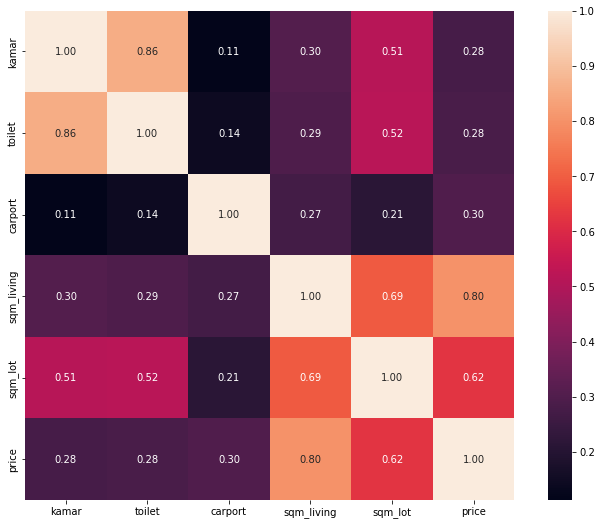

In [30]:
#correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, fmt='.2f',annot=True);

From the heatmap, we can see that sqm_living has the highest correlation with price, which makes much sense because big houses are generally more expensive.

In [31]:
df2.head()

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
0,Rumah Full Furnish Nyaman Terawat Dan Bagus di...,"Rp 8,5 Miliar","Dago, Bandung",9,10,0,534 m²,500 m²,Bandung,Dago,534,500,8500000000.00
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,274000000.00
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2200000000.00
3,Rumah Terawat Nyaman Dan Aman di Komplek Pharm...,"Rp 1,8 Miliar","Bandung Kulon, Bandung",4,3,3,300 m²,200 m²,Bandung,Bandung Kulon,300,200,1800000000.00
4,Rumah Di Resor Dago Pakar Bandung Utara Dago R...,"Rp 5,65 Miliar","Dago, Bandung",4,3,2,460 m²,450 m²,Bandung,Dago,460,450,5650000000.00


# Finding Outliers

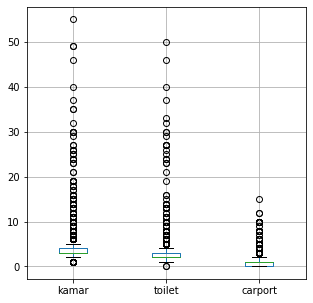

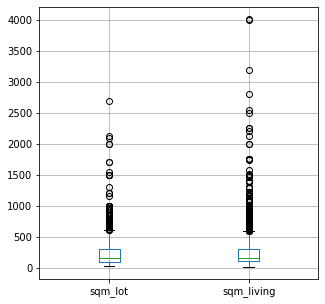

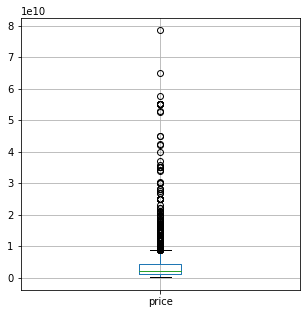

In [32]:
df2[['kamar', 'toilet', 'carport']].boxplot(figsize=(5,5))
plt.show()
df2[['sqm_lot', 'sqm_living']].boxplot(figsize=(5,5))
plt.show()
df2[['price']].boxplot(figsize=(5,5))
plt.show()

From the graph, we can see so many outliers in our data. So we need to do outliers removal.
We can use Interquartile Range Method or Standard Deviation Method.
To choose what we will use, first, we must see the data.
If we have normal data (the distribution of values is Gaussian or Gaussian-like), we can use STD Method, but if we have skewed data, we can use the IQR method.

array([[<AxesSubplot: title={'center': 'kamar'}>,
        <AxesSubplot: title={'center': 'toilet'}>],
       [<AxesSubplot: title={'center': 'carport'}>,
        <AxesSubplot: title={'center': 'sqm_lot'}>],
       [<AxesSubplot: title={'center': 'sqm_living'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

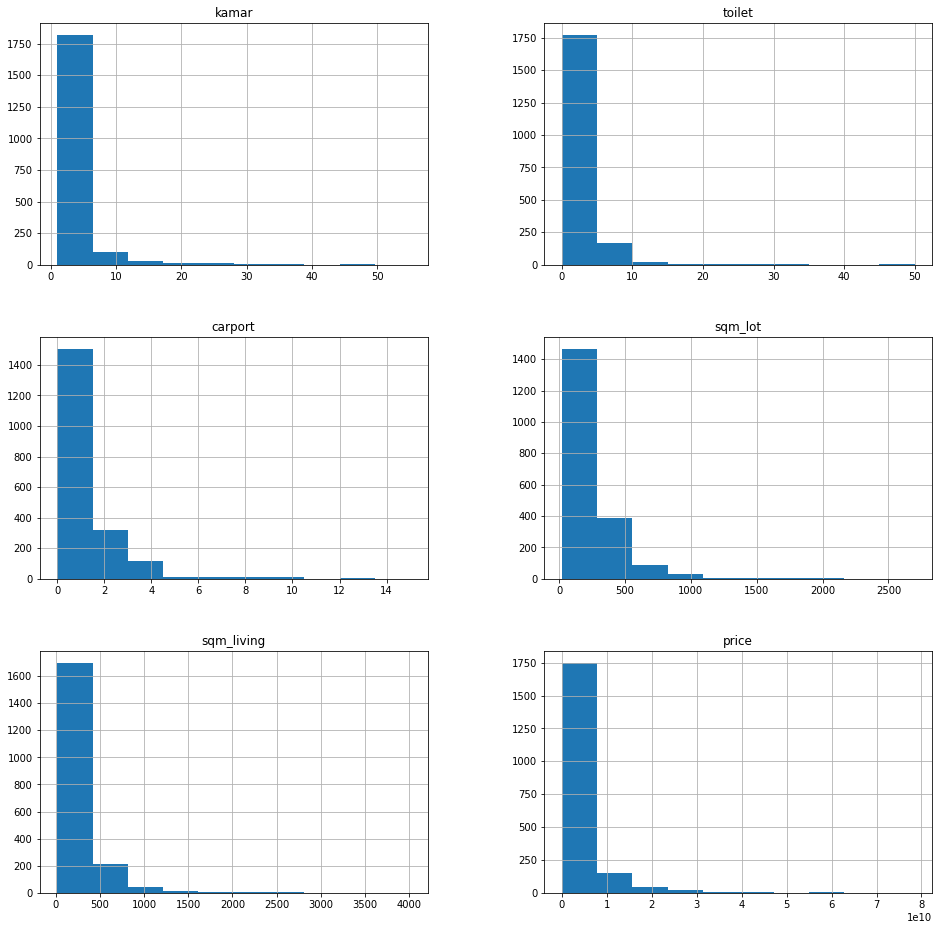

In [33]:
df2[['kamar', 'toilet', 'carport', 'sqm_lot', 'sqm_living', 'price']].hist(figsize=(16,16))

From the graph, we can see that the data looks more skewed rather than having a normal distribution.
Then we can use the IQR method to handle outliers for our data.

In [34]:
dfx = df2.copy()

def outliersremoveiqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return df[(df[feature]<lower_limit)|(df[feature]>upper_limit)].index

# def outliersremovezscore(df, feature):
#     upperlimit = df[feature].mean()+df[feature].std()*3
#     lowerlimit = df[feature].mean()-df[feature].std()*3
#     return df[(df[feature]>upperlimit) | (df[feature]<lowerlimit)].index

for i in ['kamar', 'toilet', 'carport', 'sqm_lot', 'sqm_living', 'price']:
    dfx = dfx.drop(outliersremoveiqr(dfx, i), axis='index')
    

dfx

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,274000000.00
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2200000000.00
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar","Mekar Wangi, Bandung",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,82,1100000000.00
7,Dijual Rumah Baru Cluster Terbaru Tengah Kota ...,"Rp 1,1 Miliar","Leuwi Panjang, Bandung",3,2,0,55 m²,82 m²,Bandung,Leuwi Panjang,55,82,1100000000.00
8,Rumah mewah dekat kota,Rp 636 Juta,"Kopo, Bandung",2,2,1,98 m²,70 m²,Bandung,Kopo,98,70,636000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,for Sale Rumah di Kbp Tatar Lokacitra,"Rp 4,5 Miliar","Padalarang, Bandung",5,3,0,162 m²,215 m²,Bandung,Padalarang,162,215,4500000000.00
1985,Dijual Rumah Huk di Bahagia Permai Margacinta ...,"Rp 2,5 Miliar","Buah Batu, Bandung",4,3,0,289 m²,180 m²,Bandung,Buah Batu,289,180,2500000000.00
1986,Rumah Baru Nan Cantik Type Dayana di Summareco...,"Rp 1,6 Miliar","Soekarno Hatta, Bandung",2,2,0,108 m²,70 m²,Bandung,Soekarno Hatta,108,70,1600000000.00
1987,Dijual Rumah Permata Buah Batu Seberang Telkom...,"Rp 1,2 Miliar","Buah Batu, Bandung",3,3,0,100 m²,130 m²,Bandung,Buah Batu,100,130,1200000000.00


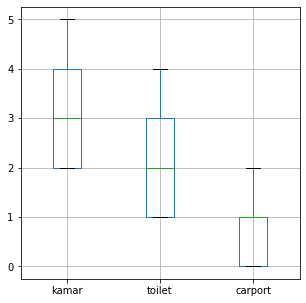

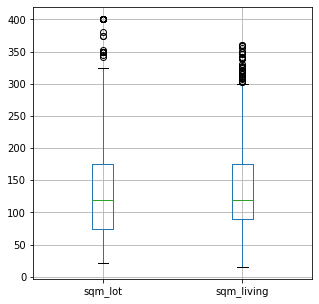

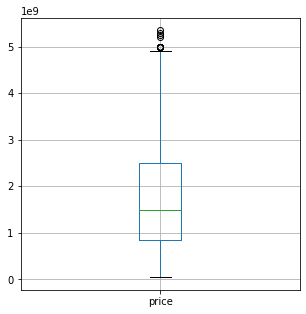

In [35]:
dfx[['kamar', 'toilet', 'carport']].boxplot(figsize=(5,5))
plt.show()
dfx[['sqm_lot', 'sqm_living']].boxplot(figsize=(5,5))
plt.show()
dfx[['price']].boxplot(figsize=(5,5))
plt.show()

We can see that our data outliers have been got removed

In [36]:
df2 = dfx.copy()

array([[<AxesSubplot: title={'center': 'kamar'}>,
        <AxesSubplot: title={'center': 'toilet'}>],
       [<AxesSubplot: title={'center': 'carport'}>,
        <AxesSubplot: title={'center': 'sqm_living'}>],
       [<AxesSubplot: title={'center': 'sqm_lot'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

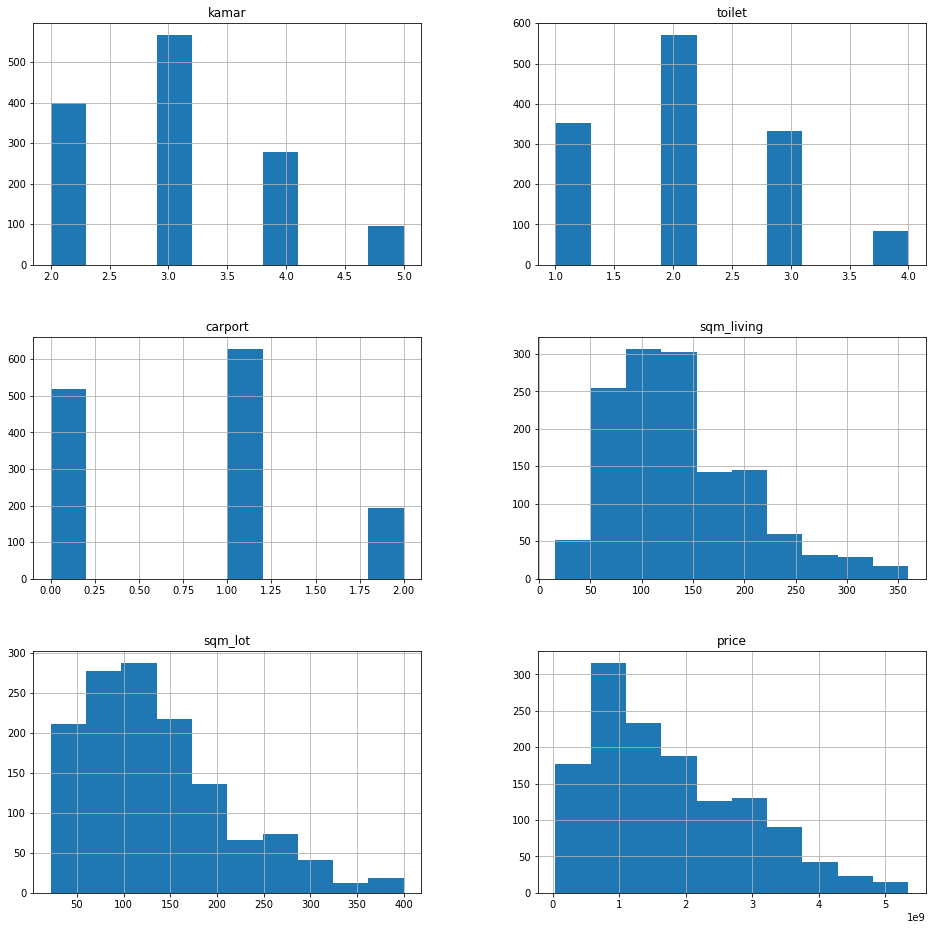

In [37]:
import seaborn as sns

numerical_features = [features for features in df2.columns if df2[features].dtype!='object']
df_temp = df2[numerical_features]
df_temp.hist(figsize=(16,16))

Our data has a skewed model, so we need to do the normalization when trying to train the data. Because it is skew, we can use Power Transformer method to make data more normal (Gaussian).

We need to ensure that each region (daerah) appeared on the data at least 1% of the total data to prevent undersampling in particular regions when doing modeling and prediction.

In [38]:
data = df2.copy()
df_temp = df2['daerah'].value_counts()
for i,j in data['daerah'].iteritems():
    if(df_temp[j]<0.01*df2.shape[0]):
        data.drop(i, axis = 0, inplace=True)

data

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,274000000.00
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2200000000.00
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar","Mekar Wangi, Bandung",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,82,1100000000.00
8,Rumah mewah dekat kota,Rp 636 Juta,"Kopo, Bandung",2,2,1,98 m²,70 m²,Bandung,Kopo,98,70,636000000.00
15,Dijual Rumah Cantik Full Furnish Singgasana Pr...,"Rp 2,29 Miliar","Mekar Wangi, Bandung",3,2,1,125 m²,110 m²,Bandung,Mekar Wangi,125,110,2290000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,Rumah Siap Huni Tengah Kota Area Rajamantri Bu...,"Rp 3,8 Miliar","Turangga, Bandung",3,1,0,240 m²,300 m²,Bandung,Turangga,240,300,3800000000.00
1984,for Sale Rumah di Kbp Tatar Lokacitra,"Rp 4,5 Miliar","Padalarang, Bandung",5,3,0,162 m²,215 m²,Bandung,Padalarang,162,215,4500000000.00
1985,Dijual Rumah Huk di Bahagia Permai Margacinta ...,"Rp 2,5 Miliar","Buah Batu, Bandung",4,3,0,289 m²,180 m²,Bandung,Buah Batu,289,180,2500000000.00
1986,Rumah Baru Nan Cantik Type Dayana di Summareco...,"Rp 1,6 Miliar","Soekarno Hatta, Bandung",2,2,0,108 m²,70 m²,Bandung,Soekarno Hatta,108,70,1600000000.00


In [39]:
df3 = data.copy()

In [40]:
df3[df3['subdistrict'] == "Bandung Kota"]['price'].mean()

1209761904.7619047

# Plotting Data

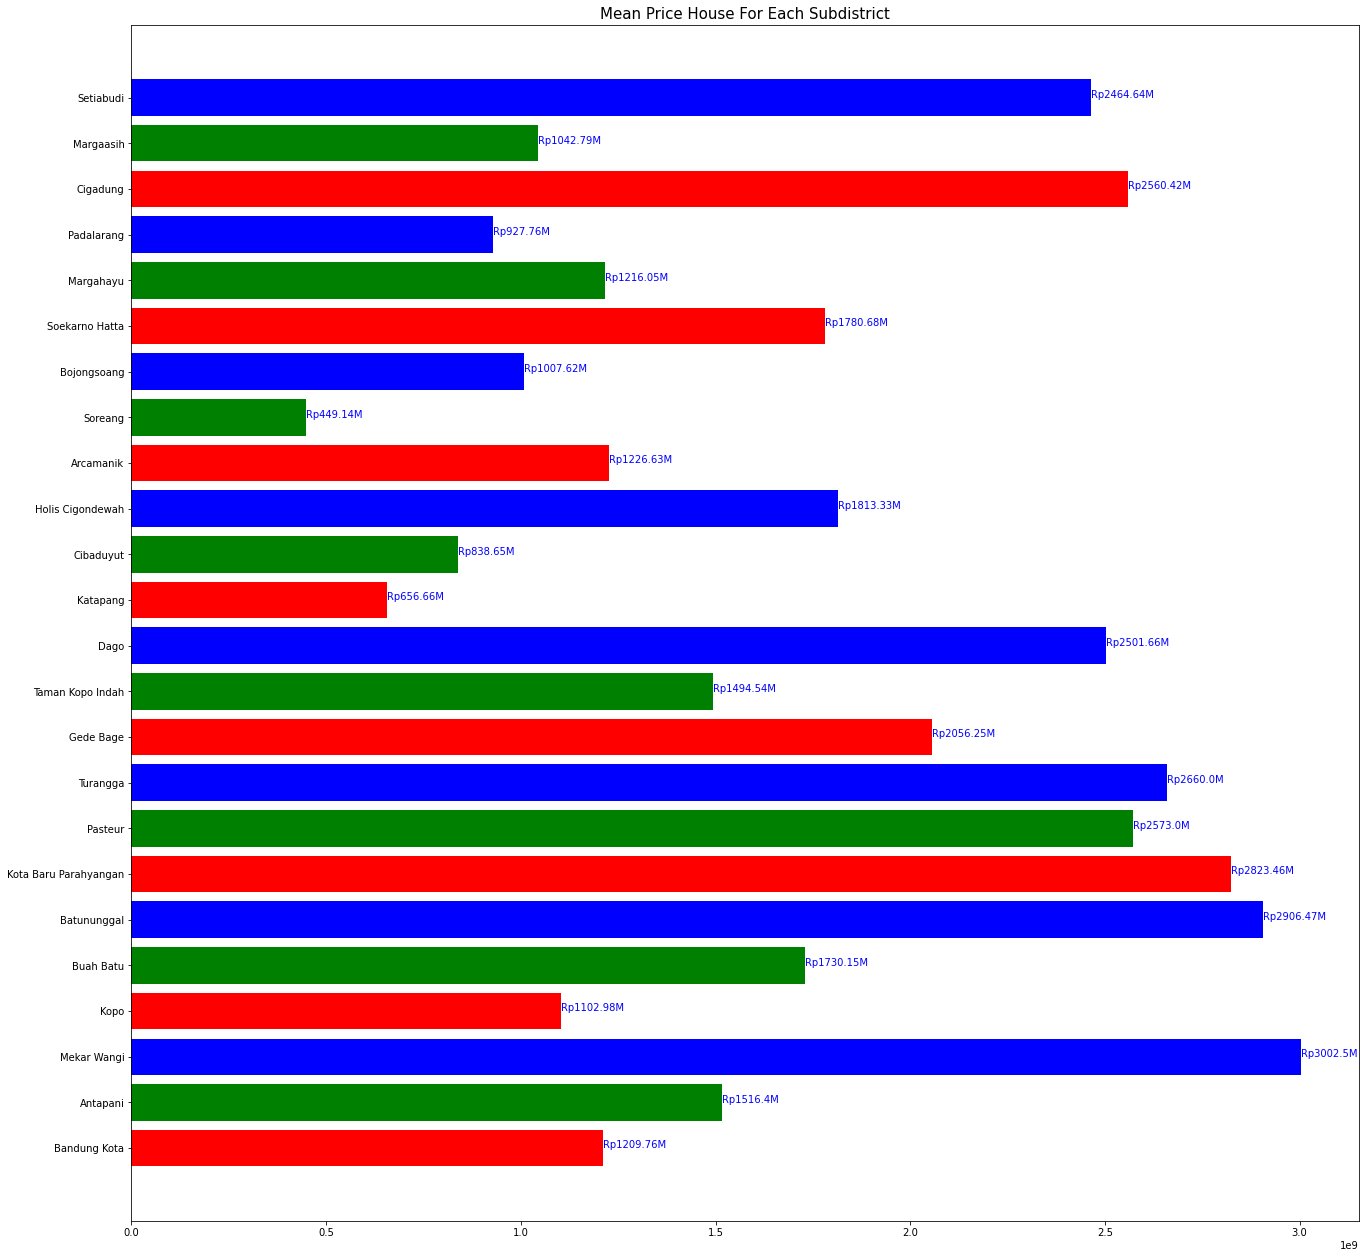

In [41]:
data = df3.copy()

unique_subdist = data['subdistrict'].unique()


subdist_with_avgprice = {}

for i,j in enumerate(unique_subdist):
    subdist_with_avgprice[j] = [data[data['subdistrict'] == unique_subdist[i]]['price'].mean()]
    

dx = pd.DataFrame(subdist_with_avgprice)

fig, ax = plt.subplots(figsize=[22,22])


for i, v in enumerate(dx.iloc[0]):
    a = v/1000000
    ax.text(v, i, ('Rp' + str(round(a,2)) + 'M'), color='blue')

ax.set_title('Mean Price House For Each Subdistrict', fontsize=15)
ax.barh(dx.columns, dx.iloc[0], color = ['r', 'g', 'b'])
plt.show()


From the graph, we can see that subdistrict Mekar Wangi has the highest average price house in the dataset. Besides, we can also see that subdistrict Soreang has the lowest average price house in the dataset.

# Modelling The Data

In [42]:
df4 = df3.copy()
df4['daerah'].value_counts(), df4['daerah'].value_counts().count()

(Kota Baru Parahyangan, Bandung    130
 Taman Kopo Indah, Bandung          98
 Arcamanik, Bandung                 65
 Bandung Kota, Bandung              63
 Buah Batu, Bandung                 62
 Antapani, Bandung                  60
 Mekar Wangi, Bandung               52
 Kopo, Bandung                      50
 Holis Cigondewah, Bandung          36
 Batununggal, Bandung               34
 Turangga, Bandung                  32
 Gede Bage, Bandung                 32
 Cibaduyut, Bandung                 31
 Katapang, Bandung                  29
 Bojongsoang, Bandung               24
 Cigadung, Bandung                  24
 Dago, Bandung                      22
 Soekarno Hatta, Bandung            22
 Pasteur, Bandung                   20
 Margahayu, Bandung                 19
 Padalarang, Bandung                17
 Soreang, Bandung                   14
 Margaasih, Bandung                 14
 Setiabudi, Bandung                 14
 Name: daerah, dtype: int64,
 24)

In [43]:
df4['price'].describe()

count          964.00
mean    1830526452.28
std     1147924034.90
min       79500000.00
25%      915000000.00
50%     1600000000.00
75%     2650000000.00
max     5350000000.00
Name: price, dtype: float64

There are around 24 subdistricts that will take place in our modeling.

In [44]:
df5 = df4.copy()

Computer does not understand string when it comes to modeling or training the data. Then we need to encode the string value so it can be get trained.

In [45]:
encoding = pd.get_dummies(df5.daerah)
encoding.head()

,"Antapani, Bandung","Arcamanik, Bandung","Bandung Kota, Bandung","Batununggal, Bandung","Bojongsoang, Bandung","Buah Batu, Bandung","Cibaduyut, Bandung","Cigadung, Bandung","Dago, Bandung","Gede Bage, Bandung",...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
df6 = pd.concat([df5, encoding], axis = 'columns').drop('daerah',axis = 'columns')
df6.head()

,namaproduk,harga,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,...,0,0,0,0,0,0,0,0,0,0
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar",4,3,2,280 m²,214 m²,Bandung,Antapani,280,...,0,0,0,0,0,0,0,0,0,0
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,...,0,0,1,0,0,0,0,0,0,0
8,Rumah mewah dekat kota,Rp 636 Juta,2,2,1,98 m²,70 m²,Bandung,Kopo,98,...,0,0,0,0,0,0,0,0,0,0
15,Dijual Rumah Cantik Full Furnish Singgasana Pr...,"Rp 2,29 Miliar",3,2,1,125 m²,110 m²,Bandung,Mekar Wangi,125,...,0,0,1,0,0,0,0,0,0,0


In [47]:
df7 = df6.drop(['namaproduk', 'harga', 'luastanah', 'luasbangunan', 'city', 'subdistrict'], axis ='columns')

df7

,kamar,toilet,carport,sqm_living,sqm_lot,price,"Antapani, Bandung","Arcamanik, Bandung","Bandung Kota, Bandung","Batununggal, Bandung",...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,2,1,1,72,50,274000000.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3,2,280,214,2200000000.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2,1,55,82,1100000000.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,2,1,98,70,636000000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,2,1,125,110,2290000000.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,3,1,0,240,300,3800000000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1984,5,3,0,162,215,4500000000.00,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1985,4,3,0,289,180,2500000000.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,2,0,108,70,1600000000.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# MODELLING

<!-- Remember that Carport feature will exclude from the modeling because it gives a very low correlation with the price feature -->

In [48]:
X = df7.drop(['price'], axis='columns')
X

,kamar,toilet,carport,sqm_living,sqm_lot,"Antapani, Bandung","Arcamanik, Bandung","Bandung Kota, Bandung","Batununggal, Bandung","Bojongsoang, Bandung",...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,2,1,1,72,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3,2,280,214,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2,1,55,82,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,2,1,98,70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,2,1,125,110,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,3,1,0,240,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1984,5,3,0,162,215,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1985,4,3,0,289,180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,2,0,108,70,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
y = df7['price']
y

1       274000000.00
2      2200000000.00
5      1100000000.00
8       636000000.00
15     2290000000.00
            ...     
1983   3800000000.00
1984   4500000000.00
1985   2500000000.00
1986   1600000000.00
1987   1200000000.00
Name: price, Length: 964, dtype: float64

# ML Model

We are going to use lazypredict to get a quick insight into what model we can use and do the hyperparameter tuning

Remember that we will use Power Transformation to make data more normal (Gaussian).

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose = 0,
                     ignore_warnings = True,
                     custom_metric = None,
                     predictions = False,
                     random_state = 0
                   )

pt = PowerTransformer()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

models, predictions = clf.fit(pt.fit_transform(X_train), pt.transform(X_test) ,y_train , y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:16<00:00,  2.58it/s]


In [51]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.76,0.80,521443241.76,0.36
GradientBoostingRegressor,0.76,0.80,523174027.65,0.12
XGBRegressor,0.76,0.79,525401255.97,0.14
PoissonRegressor,0.75,0.78,536446194.61,0.04
LassoCV,0.74,0.78,538636477.80,0.08
LassoLarsIC,0.74,0.78,538784960.00,0.02
LassoLarsCV,0.74,0.78,538786124.88,0.05
LarsCV,0.74,0.78,538786124.88,0.04
RidgeCV,0.74,0.78,539133564.05,0.02


From the results, we can get R and RMSE for almost every possible modeling method to do regression on our data.
We will take the best three models (ExtraTrees, GradientBoosting, and XGB) to do hyperparameter tuning so we can get (hopefully) the best of the best model we can use to train our data.

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

xgbregressor = xgb.XGBRegressor(random_state=42)
extratrees = ExtraTreesRegressor(random_state=42)
grboost = GradientBoostingRegressor(random_state=42)

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'xgbregressor': {
        'model': xgbregressor,
        'params':{
        'xgbregressor__booster': ['gbdt', 'dart', 'rf'],
        'xgbregressor__max_depth':[10, 13, 15, 17, 19, 21],
        'xgbregressor__learning_rate': [0.1, 0.05, 0.5],
        'xgbregressor__n_estimators': [100,300,500]
        }
    },
    'grboostregressor': {
        'model': grboost,
        'params':{
        'gradientboostingregressor__loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
        'gradientboostingregressor__learning_rate': [0.1, 0.05, 0.5],
        'gradientboostingregressor__n_estimators': [100,200,300]
        }
    },
    'extratrees': {
        'model': extratrees,
        'params':{
        'extratreesregressor__n_estimators': [100,200,300],
        'extratreesregressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'extratreesregressor__min_samples_leaf':[1,3,5]
        }
    }
}

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
scores = []
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pt = PowerTransformer()


for algo_name, config in hyperparameter_grid.items():
        pl = make_pipeline(PowerTransformer(), config['model'])
        random_cv =  RandomizedSearchCV(pl, config['params'], cv=5, scoring = 'neg_root_mean_squared_error', return_train_score=True, random_state=42)
        random_cv.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': random_cv.best_score_,
            'best_params': random_cv.best_params_
        })
        print(pd.DataFrame(scores,columns=['model','best_score','best_params']))
        print("=========")

          model    best_score  \
0  xgbregressor -552335945.05   

                                         best_params  
0  {'xgbregressor__n_estimators': 300, 'xgbregres...  
              model    best_score  \
0      xgbregressor -552335945.05   
1  grboostregressor -541035452.79   

                                         best_params  
0  {'xgbregressor__n_estimators': 300, 'xgbregres...  
1  {'gradientboostingregressor__n_estimators': 30...  
              model    best_score  \
0      xgbregressor -552335945.05   
1  grboostregressor -541035452.79   
2        extratrees -529161697.84   

                                         best_params  
0  {'xgbregressor__n_estimators': 300, 'xgbregres...  
1  {'gradientboostingregressor__n_estimators': 30...  
2  {'extratreesregressor__n_estimators': 200, 'ex...  


In [54]:
scores

[{'model': 'xgbregressor',
  'best_score': -552335945.0484751,
  'best_params': {'xgbregressor__n_estimators': 300,
   'xgbregressor__max_depth': 10,
   'xgbregressor__learning_rate': 0.1,
   'xgbregressor__booster': 'dart'}},
 {'model': 'grboostregressor',
  'best_score': -541035452.7944841,
  'best_params': {'gradientboostingregressor__n_estimators': 300,
   'gradientboostingregressor__loss': 'huber',
   'gradientboostingregressor__learning_rate': 0.1}},
 {'model': 'extratrees',
  'best_score': -529161697.8359181,
  'best_params': {'extratreesregressor__n_estimators': 200,
   'extratreesregressor__min_samples_leaf': 3,
   'extratreesregressor__criterion': 'poisson'}}]

From the scores above, we can say that the extra trees model is most likely the best model that we can use as our training model for our dataset

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
extratrees = ExtraTreesRegressor(random_state=42, n_estimators=200, min_samples_leaf=3, criterion='poisson')

pt = PowerTransformer()

X_scaled = pt.fit_transform(X)

extratrees.fit(X_scaled, y)

ExtraTreesRegressor(criterion='poisson', min_samples_leaf=3, n_estimators=200,
                    random_state=42)

Let us make a simple application that can get input from a user to predict house prices based on his criteria

In [56]:
def predict_price(location,bedroom,toilet, carport, sqm_lot, sqm_living):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = toilet
    x[2] = carport
    x[3] = sqm_lot
    x[4] = sqm_living
    if loc_index >= 0:
        x[loc_index] = 1
    x = pt.transform(np.array(x).reshape(1,len(x)))

    predict = extratrees.predict(x)[0]
    return predict



In [57]:
predict_price("Bandung Kota, Bandung",2,1,1,120,160)

1645014597.222222

In [58]:
from ipywidgets import widgets
from IPython.display import display

dfwidget = df4.copy()


def printfinalprediction(city,subdistrict, bedroom, toilet, carport, sqm_lot, sqm_living):
    reg = "{}, {}".format(subdistrict, city)
    pricepred = predict_price(reg, bedroom, toilet, carport, sqm_lot, sqm_living)
    currencypr = 'Rp{:,.2f}'.format(pricepred)
    print("House price in {} with {} bedroom(s), {} toilet(s), land area {} m², and building area {}m² around: \n{}".format(reg, bedroom, toilet, sqm_lot, sqm_living, currencypr))



def select_subdisctrict(city):
    cityW.options = dfwidget[dfwidget['city']==city]["subdistrict"].unique()


bedroom = widgets.IntText(
    value=7,
    description='Bedroom:',
    disabled=False
)

toilet = widgets.IntText(
    value=7,
    description='Toilet:',
    disabled=False
)

carport = widgets.IntText(
    value=7,
    description='Carport:',
    disabled=False
)

sqm_lot = widgets.IntText(
    value=7,
    description='Lot Area(m²):',
    disabled=False
)

sqm_living = widgets.IntText(
    value=7,
    description='Living Area(m²):',
    disabled=False
)
    
scW = widgets.Select(options=dfwidget["city"].unique())
init = scW.value
cityW = widgets.Select(options=dfwidget[dfwidget['city']==init]["subdistrict"].unique())
j = widgets.interactive(printfinalprediction, subdistrict=cityW, city=scW, bedroom=bedroom, toilet=toilet, carport = carport, sqm_lot=sqm_lot, sqm_living=sqm_living)
i = widgets.interactive(select_subdisctrict, city=scW)

display(j)

interactive(children=(Select(description='city', options=('Bandung',), value='Bandung'), Select(description='s…

In [59]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(extratrees, open(filename, 'wb'))

In [60]:
filename = 'finalized_transform.sav'
pickle.dump(pt, open(filename, 'wb'))

In [61]:
X.to_csv("X.csv")

# THE END

This is the end of Bandung House Price Prediction Program.

We can add many other features to boost our model, i.e., furnished/unfurnished house, built year of the house, total floors in the house, the position of the house, and many more.
Our model is also limited only to 24 subdistricts, while Bandung has subdistricts more than that.

In the future, I hope we can improve the model to predict more accurately.

If you have any questions or suggestions, feel free to contact me by benitobosco8@gmail.com

Last but not least, you can try this program at: https://benitobosco-bandung-house-price-prediction-main-9y4pr1.streamlit.app/